In [1]:
#!pip3 install sklearn
#!pip3 install xgboost

In [1]:
from PIL import Image
import os
from os import listdir
from os.path import isfile, join
import numpy as np
from tqdm.notebook import tqdm
import cv2
import pickle
from sklearn.model_selection import train_test_split as tts
import pandas as pd
from time import sleep

def getImageVector(img):
    #img = Image.open(img)
    img = img.resize( (100, 100) )
    img = img.convert('L')
    return imgToVector(img) 

#Funcion para vectorizar imagenes y asignales clasificación
def imgToVector(img,x=100,y=100,classification=1):
    vector=[]
    vector.append(classification)

    for j in range(y):
        for i in range(x):
            vector.append(img.getpixel((i,j)))
    return vector

def reconstructor(vector,x=100,y=100):
    reb=Image.new('L',(x,y))
    for j in range(y):
        for i in range(x):
            reb.putpixel((i,j),vector[i+j*x]) 
    return reb

def rescale_frame(frame, percent=75):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

def getfaces(img):
    
    source = Image.open(img)
    source = source.convert('L')
    
    original_image = cv2.imread(img)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    detected_faces = face_cascade.detectMultiScale(grayscale_image)
    
    faces=[]
    
    for i in detected_faces:
        tlbr=list(i)
        
        x=int(tlbr[2])
        y=int(tlbr[3])
        x_offset=int(tlbr[0])
        y_offset=int(tlbr[1])

        face=Image.new('L',(x,y))

        source
        for j in range(y):
            for i in range(x):
                pixel=source.getpixel((i+x_offset,j+y_offset))
                face.putpixel((i,j),pixel) 
        faces.append(face)

    return faces


In [2]:
#Carga de modelo guardado
xgbc = []
with (open("xgbc", "rb")) as openfile:
    while True:
        try:
            xgbc.append(pickle.load(openfile))
        except EOFError:
            break
xgbc=xgbc[0]

In [7]:
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    frame50 = rescale_frame(frame,percent=50)
    #cv2.imshow("test", frame50)
    img='current_img.png'
    
    cv2.imwrite(img, frame)
    faces=getfaces(img)
    
    for i in range(len(faces)):
        
        X=pd.DataFrame(getImageVector(faces[i])).T
        X=X.drop(0,axis=1)
        prediccion=xgbc.predict(X)
        X=list(X.T[0])
        print('💀',i) if prediccion == 0 else print('😷',i)
    
    #sleep(1)    
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    

print('Release')
cam.release()
print('Destroy')
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)
print('End')

💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
😷 0
😷 0
💀 0
💀 0
💀 0
😷 0
💀 0
😷 0
😷 0
💀 0
😷 0
💀 0
💀 0
💀 0
😷 0
💀 0
💀 0
💀 0
💀 0
😷 0
😷 0
😷 0
😷 0
😷 0
😷 0
😷 0
😷 0
😷 0
😷 0
😷 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
😷 0
😷 0
😷 0
💀 0
😷 0
💀 0
😷 0
😷 0
😷 0
😷 0
😷 0
😷 0
😷 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0
💀 0


KeyboardInterrupt: 

In [4]:
img='current_img.png'
X=pd.DataFrame(getImageVector(img)).T
X=X.drop(0,axis=1)
prediccion=xgbc.predict(X)
X=list(X.T[0])
grayscale_image=reconstructor(X)
grayscale_image

AttributeError: 'str' object has no attribute 'resize'

In [7]:
#Obtener Imagen de Webcam

cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
ret, frame = cam.read()
frame50 = rescale_frame(frame,percent=50)
cv2.imshow("test", frame50)

cv2.imwrite("current_img.png", frame)
print('Release')
cam.release()
print('Destroy')
cv2.destroyAllWindows()
print('End')

Release
Destroy
End


In [3]:
cv2.startWindowThread()
cv2.imshow('Image', grayscale_image)
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

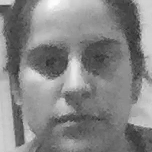

In [48]:
faces=getfaces('current_img.png')
faces[0]

In [ ]:
import cv2
grayscale_image=cv2.imread('current_img.png')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
detected_faces = face_cascade.detectMultiScale(grayscale_image)

for (column, row, width, height) in detected_faces:
    cv2.rectangle(
        grayscale_image,
        (column, row),
        (column + width, row + height),
        (0, 255, 0),
        2
    )

## Rutinas para entrenar nuevos modelos

In [5]:
#Cargando datos para entrenar

mask = []
with (open("mask.pickle", "rb")) as openfile:
    while True:
        try:
            mask.append(pickle.load(openfile))
        except EOFError:
            break
mask=mask[0]

nomask = []
with (open("nomask.pickle", "rb")) as openfile:
    while True:
        try:
            nomask.append(pickle.load(openfile))
        except EOFError:
            break
nomask=nomask[0]

XYTrain=mask+nomask
XYTrain = pd.DataFrame(XYTrain)

X_train, X_test, y_train, y_test=tts(XYTrain.drop(0, axis=1),XYTrain[0], test_size=0.2, random_state=101)
#X_train, X_test, y_train, y_test=tts(XYTrain.drop(0, axis=1),XYTrain[0], test_size=1, random_state=101)

In [8]:
from xgboost import XGBClassifier as XGBC

xgbc=XGBC()
xgbc.fit(X_train, y_train)

train_score=xgbc.score(X_train, y_train)
test_score=xgbc.score(X_test, y_test)

print (train_score, test_score)

pickle.dump(xgbc,open("xgbc","wb"))

1.0 0.9422272900038008
